In [3]:
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)

In [4]:
from sklearn.datasets import load_iris

In [200]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [7]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
type(iris) #dic을 wrapping(boxing) class

sklearn.utils.Bunch

In [15]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
len(iris.data)

150

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
df = pd.DataFrame(data=iris.data, #2ndarray
                               columns=iris.feature_names #리스트
                 )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df['species'] = iris.target

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [27]:
df['species'] = df['species'].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [29]:
df['species'] = df['species'].cat.rename_categories(iris.target_names)
df['species'] 
##라벨인코딩은 abc순서대로 되어있기 때문에, abc순서대로 rename된다.

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [30]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

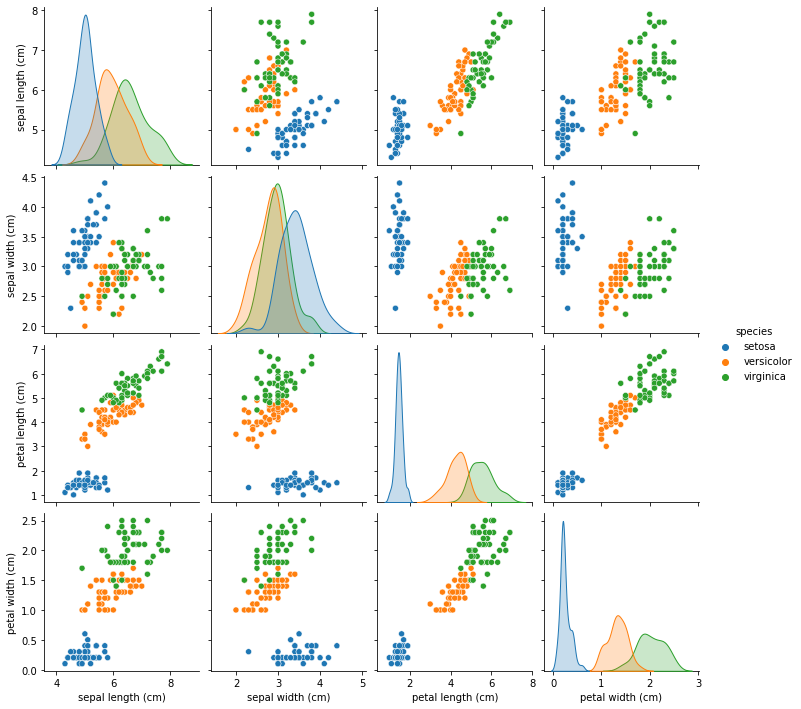

In [32]:
## pairplot
sns.pairplot(df, hue='species')

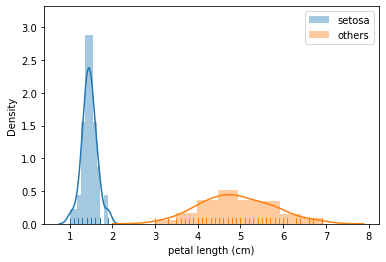

In [39]:
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()

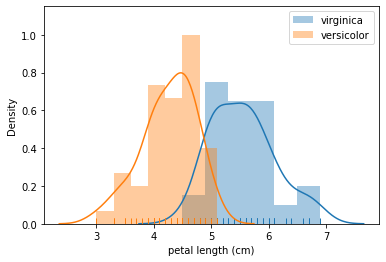

In [40]:
## virginica, versicolor
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend() #범례

In [ ]:
## setosa가 꽃잎의 길이가 제일 짧다, virginica가 제일 길다.
## 꽃잎의 길이 1.5전후 짧은 것은 모두다 setosa이다.
## virginica가 versicolor보다는 꽃잎의 길이가 약간 긴 편이지만, 
## 종을 판별하기 위한 절대적인 기준은 되지 않는다.

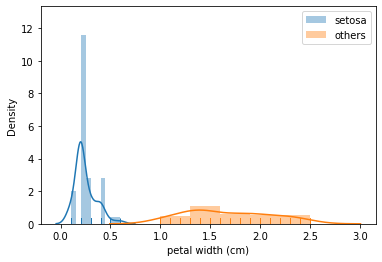

In [41]:
## petal width, 3개의 품종을 비교
sns.distplot(df[df.species == "setosa"]["petal width (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species != "setosa"]["petal width (cm)"], hist=True, rug=True, label="others")
plt.legend()

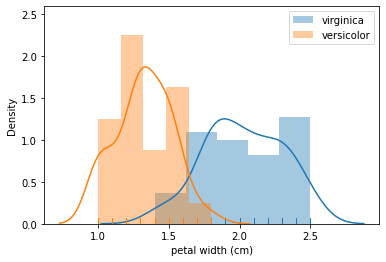

In [45]:
## virginica, versicolor
sns.distplot(df[df.species == "virginica"]["petal width (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal width (cm)"], hist=True, rug=True, label="versicolor")
plt.legend() 

In [ ]:
## 꽃잎의 너비를 비교 결과, setosa가 제일 작은 꽃임.
## 전체적인 꽃잎의 크기는 virginica가 제일 크다.
## 꽃잎의 너비가 다른 꽃보다 상대적으로 많이 setosa가 작으므로,
## 꽃잎의 너비 1미만은 모두 setosa!
## 꽃잎의 너비는 iris의 품종을 분류하기에 적합한 항목이 됨.

In [46]:
from pandas.plotting import parallel_coordinates

Text(0, 0.5, 'features values')

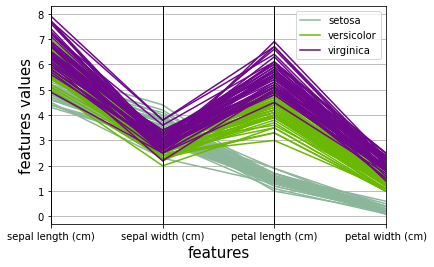

In [48]:
parallel_coordinates(df, 'species')
plt.xlabel('features', fontsize=15)
plt.ylabel('features values', fontsize=15)

In [49]:
## petal width, petal length는 학습의 중요 속성이 될 예정이므로 사용
## sepal width, sepal length는 구분의 중요 속성이 아니므로 제거해도 될 것 같음.

In [ ]:
## sepal length, sepal width 각각 항목별로 꽃들이 어떤 차이를 가지는지 
## 의 범위를 표준화시켜 비교해보다.

In [50]:
ss = StandardScaler() #표준(평균값 기준)

In [51]:
## 표준화를 기준으로 인코딩을 하려고 함.
## fit->transform, fit_transform

In [55]:
test_list = [1, 2, 3]

In [57]:
test_list[0]

1

In [58]:
test_list[-1]

3

In [69]:
ss.fit_transform(df.iloc[:, :-1])[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df.iloc[:, :-1], #문제,
                                                    df.iloc[:, -1], #정답,
                                                    test_size=0.2, #테스트 비율,
                                                    random_state=42#랜덤 시드값
)

In [71]:
print('train data : ', X_train.shape, y_train.shape)
print('test data : ', X_test.shape, y_test.shape)

train data :  (120, 4) (120,)
test data :  (30, 4) (30,)


In [72]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30],
           dtype='int64')

In [73]:
y_test.value_counts()

virginica     11
setosa        10
versicolor     9
Name: species, dtype: int64

In [ ]:
## 스케일링 할때, 전체데이터나 훈련데이터로 평균(fit)를 시키고,
## 절대 검증데이터로 fit시키지 않는다.
## 훈련데이터와 검증데이터의 스케일링 기준이 달라지기 때문이다.

In [76]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_train_s[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603


In [77]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
X_test_s[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.354517,-0.585060,0.557775,0.022248
1,-0.133071,1.650837,-1.161395,-1.179118
2,2.304867,-1.032239,1.818500,1.490583
3,0.232620,-0.361470,0.443164,0.422703
4,1.207795,-0.585060,0.615081,0.289218


In [78]:
ms = MinMaxScaler()

In [79]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns=X_train.columns)
X_train_m[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.088235,0.666667,0.000000,0.041667
1,0.411765,1.000000,0.087719,0.125000
2,0.705882,0.458333,0.596491,0.541667
3,0.147059,0.583333,0.105263,0.041667
4,0.029412,0.500000,0.052632,0.041667


In [80]:
X_test_m = pd.DataFrame(ms.transform(X_test), columns=X_test.columns)
X_test_m[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.529412,0.333333,0.649123,0.458333
1,0.411765,0.750000,0.122807,0.083333
2,1.000000,0.250000,1.035088,0.916667
3,0.500000,0.375000,0.614035,0.583333
4,0.735294,0.333333,0.666667,0.541667


In [84]:
ms_df_values = ms.fit_transform(df.iloc[:, :-1])
ms_df_values[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [85]:
ms_df = pd.DataFrame(data=ms_df_values, columns=iris.feature_names)
ms_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


In [88]:
ms_df['species'] = iris.target
ms_df['species'] = ms_df['species'].astype('category')
ms_df['species'] = ms_df['species'].cat.rename_categories(iris.target_names)
ms_df['species'][:3]

0    setosa
1    setosa
2    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Text(0, 0.5, 'features values')

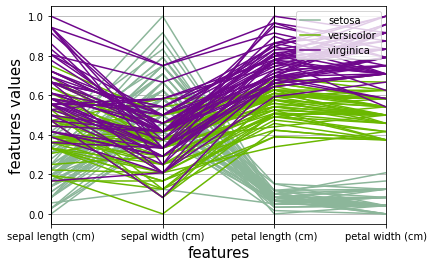

In [89]:
## 
parallel_coordinates(ms_df, 'species')
plt.xlabel('features', fontsize=15)
plt.ylabel('features values', fontsize=15)

<AxesSubplot:>

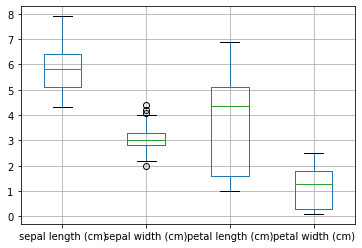

In [90]:
df.boxplot()

<AxesSubplot:>

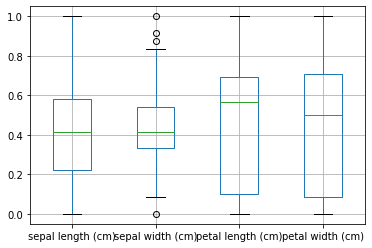

In [91]:
ms_df.boxplot()

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# cross_val_score: 다양한 샘플링을 해서 여러번 테스트--> 평균치를 구해본다.!
from sklearn.metrics import *

In [93]:
knn = KNeighborsClassifier()

In [95]:
id(knn) #참조형 knn

140273443522704

In [96]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
# 교차검증
# 샘플링을 10개해서, 10번 검증을 해보세요! 의미
# X_train을 train data, validation data로 나눈다.
# cv(fold값)가 10이면 validation data를 X_train의 1/10로 잡음
# validation data의 개수는 12개, 나머지가 train data
scores = cross_val_score(knn, X_train, y_train, cv=10) #cv = fold값!
#print(y_train[:3])
print(scores)

[0.91666667 1.         0.91666667 1.         0.83333333 0.83333333
 1.         1.         1.         0.91666667]


In [98]:
type(scores)

numpy.ndarray

In [150]:
list(scores)

[0.9166666666666666,
 1.0,
 0.9166666666666666,
 1.0,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.9166666666666666]

In [151]:
np.mean(scores)

0.9416666666666667

In [188]:
def print_metrics(model, x, y, k):
#     print(model)
#     print(x.shape, y.shape, k)
    #scores = cross_val_score(knn, X_train, y_train, cv=10)
    scores2 = cross_val_score(model, x, y, cv = k) #k = fold값!
    #print(len(list(scores2)))
    #np.set_printoptions(formatter={'float': '{: 0.3f}'.format}): 리스트에는 적용 x
    print('---------- 교차검증 결과---------- \n {} '.format(list(scores2)))
    acc_mean2 = np.mean(scores)
    print('---------- 교차검증 평균---------- \n {:.2f} '.format(acc_mean2))
#     pred = model.predict(X_test)
#     acc = accuracy_score(y_test,pred)
    print(acc)
    return scores2, acc_mean2

---------- 교차검증 결과---------- 
 [0.9583333333333334, 0.9583333333333334, 0.8333333333333334, 1.0, 0.9583333333333334] 
---------- 교차검증 평균---------- 
 0.94 


(array([ 1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  3.000,
         0.000,  1.000]),
 array([ 0.833,  0.850,  0.867,  0.883,  0.900,  0.917,  0.933,  0.950,
         0.967,  0.983,  1.000]),
 <BarContainer object of 10 artists>)

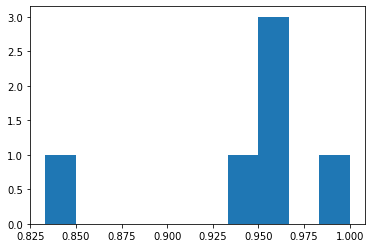

In [199]:
sc2, am2 = print_metrics(knn, X_train, y_train, 5)
list_sc2 = list(sc2)
list_sc2.append(am2) #교차검증 평균도 함께 그려보자.
plt.hist(list_sc2)

In [121]:
X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [100]:
pred = knn.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

1.0

In [122]:
y_train.dtypes

CategoricalDtype(categories=['setosa', 'versicolor', 'virginica'], ordered=False)

In [184]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
                                                    ms_df.iloc[:, :-1], #문제,
                                                    ms_df.iloc[:, -1], #정답,
                                                    test_size=0.2, #테스트 비율,
                                                    random_state=42#랜덤 시드값
)

In [185]:
## 스케일링한 데이터로 knn fit-> 교차검증과 test data로 검증해서
## 비교해보세요.!
knn.fit(X_train_m, y_train_m)

KNeighborsClassifier()

---------- 교차검증 결과---------- 
 [0.9583333333333334, 1.0, 0.875, 1.0, 0.9583333333333334] 
---------- 교차검증 평균---------- 
 0.94 


(array([ 1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  2.000,  0.000,
         0.000,  2.000]),
 array([ 0.875,  0.887,  0.900,  0.912,  0.925,  0.938,  0.950,  0.963,
         0.975,  0.988,  1.000]),
 <BarContainer object of 10 artists>)

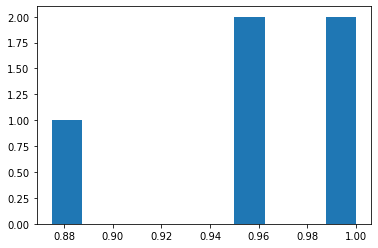

In [190]:
sc3, am3 = print_metrics(knn, X_train_m, y_train_m, 5)
plt.hist(sc3)

In [187]:
pred2 = knn.predict(X_test_m)
acc2 = accuracy_score(y_test_m,pred2)
acc2

1.0

In [ ]:
########## 모델링 선정할 때 사용
##########다양한 모델을 교차검증을 통해서 대략적으로 선정함.

In [201]:
## 대략적인 모델 2-3개를 선정했다고 가정
## 모델마다 최적의 하이퍼파라메터가 무엇인지 찾아주는 것이
## grid search

In [202]:
grid_params = {
     'n_neighbors'  : list(range(1, 20)), #19개
      'weights' : ["uniform", "distance"], #2개
      'metric' : ['euclidean', 'manhattan', 'minkowski'] #3개
} ## 19 * 2 * 3
# fold = 5, 19 * 2 * 3 * 5

In [203]:
gs_model = GridSearchCV(knn, grid_params, cv = 5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [204]:
gs_model.best_estimator_
# estimator(평가자, 예측자, 최적의 하이퍼파라메터가 적용된 우리가 만든 모델)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [205]:
gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [206]:
gs_model.best_score_

0.9666666666666666

In [207]:
gs_model = GridSearchCV(knn, grid_params, cv = 5)
gs_model.fit(X_train_m, y_train_m)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [208]:
gs_model.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [209]:
gs_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

In [210]:
gs_model.best_score_

0.975

In [ ]:
## 그리드 서치를 통해서, 최적의 파라메터를 찾았음.

In [219]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'manhattan', 
    n_neighbors = 14, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

1.0

In [ ]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'euclidean', 
    n_neighbors = 10, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3